In [14]:
using QuantumOptics
using PyPlot
using DifferentialEquations

In [15]:
function H_DE(t, psi)
    E = E0*exp(-1im*ωl*t) + conj(E0)*exp(1im*ωl*t)  # Champ électrique
    H0 = (ħ*ω0/2) * sz  # Hamiltonien sans interaction
    Hint = -d_eg * E * sx      # Interaction dipôle-champ
    return H0 + Hint
end

function H_RWA(t, psi)
    H_RWA = ω0/2*sz - ħ * (Ω_rabi*exp(-1im*ωl*t)*sp + conj(Ω_rabi)*exp(1im*ωl*t)*sm)
    return H_RWA
end

H_RWA (generic function with 1 method)

In [16]:
# Define Spin basis/operators
b_spin = SpinBasis(1//2)
sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)
sx = sigmax(b_spin)

# Operators of the system. We suppose d // E
ħ = 1.0
d_eg = 1.0
E0 = 1.0 + 0im
ωl = 10
ω0 = 10.1
d_op = d_eg*sp + conj(d_eg)*sm

# Integration time
Tstep, Tend = 1e-3, 5
T = [0:Tstep:Tend;]

# Initial state
Ψ0 = spinup(b_spin);

In [17]:
tout, Ψt = timeevolution.schroedinger_dynamic(T, Ψ0, H_DE);

In [18]:
Ω_rabi = d_eg*E0/ħ

# Initial state
Ψ0_RWA = spinup(b_spin);
tout, Ψt_RWA = timeevolution.schroedinger_dynamic(T, Ψ0_RWA, H_RWA);

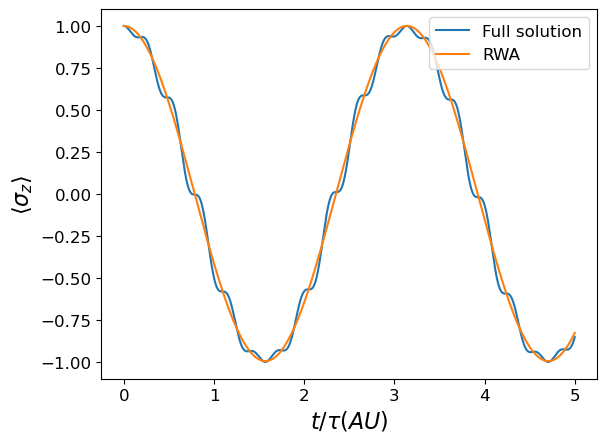

In [19]:
close("all")
pygui(false)

PyPlot.rc("font", size = 12)

plot(tout, real(expect(sz, Ψt)), label="Full solution")
plot(tout, real(expect(sz, Ψt_RWA)), label="RWA")

xlabel(L"t/\tau (AU)", fontsize=16)
ylabel(L"\langle\sigma_z\rangle", fontsize=16)
legend()

savefig("/Users/remy/Documents/Remy/ENSL_2024_2025/Stage_M2/Rapport_Stage_M2/Figures/RO.pdf", bbox_inches="tight")


gcf()